<a href="https://colab.research.google.com/github/veillette/jupyterNotebooks/blob/main/Advanced%20Lab/Least_square_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Least Squares Regression

The least squares method is a mathematical technique for best line fitting.
It minimizes the sum of the squared differences between the observed and predicted values of the dependent variable.

Mathematically, the least square method aims to find the parameters $\theta$ that minimize the sum of squared residuals (errors):

$$ \min_\theta \sum_{i=1}^{N} \left( \frac{ y_i - f(x_i,\theta)}{\sigma_i} \right)^2 $$

Here, $N$ is the number of data points, $(x_i,y_i \pm \sigma_i)$ are the  observed data points with their uncertainties, $f(x_i,\theta)$ is the model function with parameters $\theta$, and the objective is to find the best $\theta$ that minimizes this sum of squared residuals.

In [16]:
from IPython.display import HTML

# URL of curve fitting simulation
url ="https://phet.colorado.edu/sims/html/curve-fitting/latest/curve-fitting_all.html"

phet_embed_code = f"""
<iframe src="{url}"
width="600" height="400" scrolling="no" allowfullscreen></iframe>
"""

# Display the PhET simulation
display(HTML(phet_embed_code))

In [17]:
# import numpy as np
import numpy as np

# Import non-linear least squares to fit a function, f, to data.
from scipy.optimize import curve_fit

# Library to plot data
import matplotlib.pyplot as plt

In [23]:
# Define the exponentially decaying function that will be used for the least square regression.
# Note the order of the parameters in the function. The optimized values from the curve fit will be in the same order as defined in this function
def exp_decay(x, a, b, c):
    return a * np.exp(-b * x) + c

In [19]:
# Sample data
x = np.array([1, 2, 3, 4, 5])
y = np.array([10, 7, 4, 2, 1])
sigma = np.array([0.4, 0.5, 0.2, 0.3, 0.6])  # Specify the sigma values (in absolute values)

In the following section of the code, a weighted least squares fit is executed using the curve_fit function.
 This function fits a mathematical model (in this case, exp_decay) to a set of data points (x and y) while considering the uncertainties
  in the data points specified by the sigma parameter.
  
  Weighted least squares is particularly useful when dealing with data that has varying levels of uncertainty.
  The params variable will store the optimized parameters of the fitted model, while covariance will contain the covariance matrix,
  which provides information about the uncertainties in these parameters.

##Extracting Optimized Parameters

After the weighted least squares fit is performed, the code extracts the optimized parameters from the params variable. In this context, a_opt, b_opt, and c_opt represent the optimized parameters of the exp_decay model. These parameters represent the best-fit values that make the model most closely match the provided data points.

To assess the reliability of the optimized parameters, we can calculate the standard deviation of each parameter. The standard deviations (a_std_dev, b_std_dev, and c_std_dev) are computed using the square root of the diagonal elements of the covariance matrix (covariance). These standard deviations provide insights into how much uncertainty or variability exists in the optimized parameter estimates, which is crucial for understanding the precision of the fitted model and its ability to describe the underlying data.

In [20]:
# Perform the weighted least squares fit
params, covariance = curve_fit(exp_decay, x, y, sigma=sigma, absolute_sigma=True)

# Extract the optimized parameters
a_opt, b_opt, c_opt = params

# Calculate the standard deviation of the parameters
a_std_dev, b_std_dev, c_std_dev = np.sqrt(np.diag(covariance))

In [21]:
# Display the optimized parameters and their standard deviations
print("Optimized parameters:")
print(f"a = {a_opt} ± {a_std_dev}")
print(f"b = {b_opt} ± {b_std_dev}")
print(f"c = {c_opt} ± {c_std_dev}")

Optimized parameters:
a = 18.21149082811296 ± 1.9508266738023665
b = 0.2970291170573071 ± 0.09402973793385196
c = -3.4429753540819816 ± 2.7247546379935166


# Plotting

In the following section, we plot the Data with errors bars. In addition, the trendline of the least square regression is added to the graph.

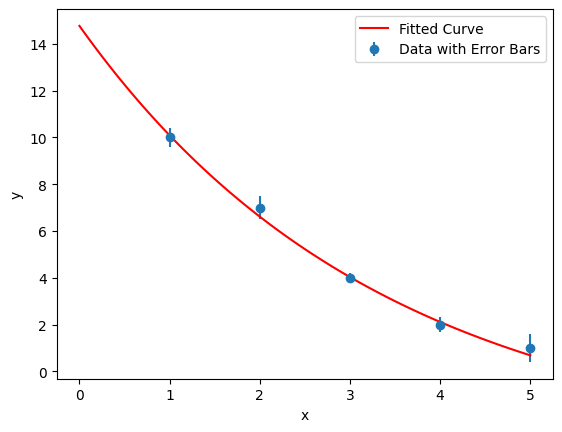

In [22]:
# Plot the original data and the fitted curve
plt.errorbar(x, y, yerr=sigma, fmt='o', label='Data with Error Bars')
x_fit = np.linspace(0, max(x), 100)
y_fit = exp_decay(x_fit, a_opt, b_opt, c_opt)
plt.plot(x_fit, y_fit, 'r-', label='Fitted Curve')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()